In [43]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [85]:
# dataset
df = pd.read_csv('../data/raw/European_Ski_Resorts.csv')

In [93]:
df.sum()

Resort               Alpendorf (Ski amedé)Soldeu-Pas de la Casa/​Gr...
Country              AustriaAndorraAustriaAustriaSouthern RussiaPol...
HighestPoint                                                    771435
LowestPoint                                                     396717
DayPassPriceAdult                                                15333
BeginnerSlope                                                    13487
IntermediateSlope                                                14419
DifficultSlope                                                    4428
TotalSlope                                                       32433
Snowparks                                                        278.0
NightSki                                                           152
SurfaceLifts                                                      5137
ChairLifts                                                        3512
GondolaLifts                                                      1487
TotalL

# Converting Columns to numerical values


In [86]:
# Converting 'NightSki' and 'Snowparks' columns to numerical values
df['NightSki'] = df['NightSki'].map({'Yes':1, 'No':0})
df['Snowparks'] = df['Snowparks'].map({'Yes':1, 'No':0})

In [87]:
df.head()

,#,Resort,Country,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,Snowparks,NightSki,SurfaceLifts,ChairLifts,GondolaLifts,TotalLifts,LiftCapacity,SnowCannons
0,1,Alpendorf (Ski amedé),Austria,1980,740,52,30,81,4,115,1.0,0,22,16,11,49,75398,600
1,2,Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...,Andorra,2640,1710,47,100,77,33,210,1.0,1,37,28,7,72,99017,1032
2,3,Oberau (Wildschönau),Austria,1130,900,30,1,0,1,2,0.0,0,2,0,0,2,1932,0
3,4,Dachstein West,Austria,1620,780,42,15,33,3,51,1.0,1,25,8,3,36,32938,163
4,5,Rosa Khutor,Southern Russia,2320,940,22,30,26,21,77,1.0,0,6,11,10,27,49228,450


# Removing Columns

In [89]:
# removing '#' column
df = df.drop('#', axis=1)

In [91]:
df.head()

,Resort,Country,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,Snowparks,NightSki,SurfaceLifts,ChairLifts,GondolaLifts,TotalLifts,LiftCapacity,SnowCannons
0,Alpendorf (Ski amedé),Austria,1980,740,52,30,81,4,115,1.0,0,22,16,11,49,75398,600
1,Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...,Andorra,2640,1710,47,100,77,33,210,1.0,1,37,28,7,72,99017,1032
2,Oberau (Wildschönau),Austria,1130,900,30,1,0,1,2,0.0,0,2,0,0,2,1932,0
3,Dachstein West,Austria,1620,780,42,15,33,3,51,1.0,1,25,8,3,36,32938,163
4,Rosa Khutor,Southern Russia,2320,940,22,30,26,21,77,1.0,0,6,11,10,27,49228,450


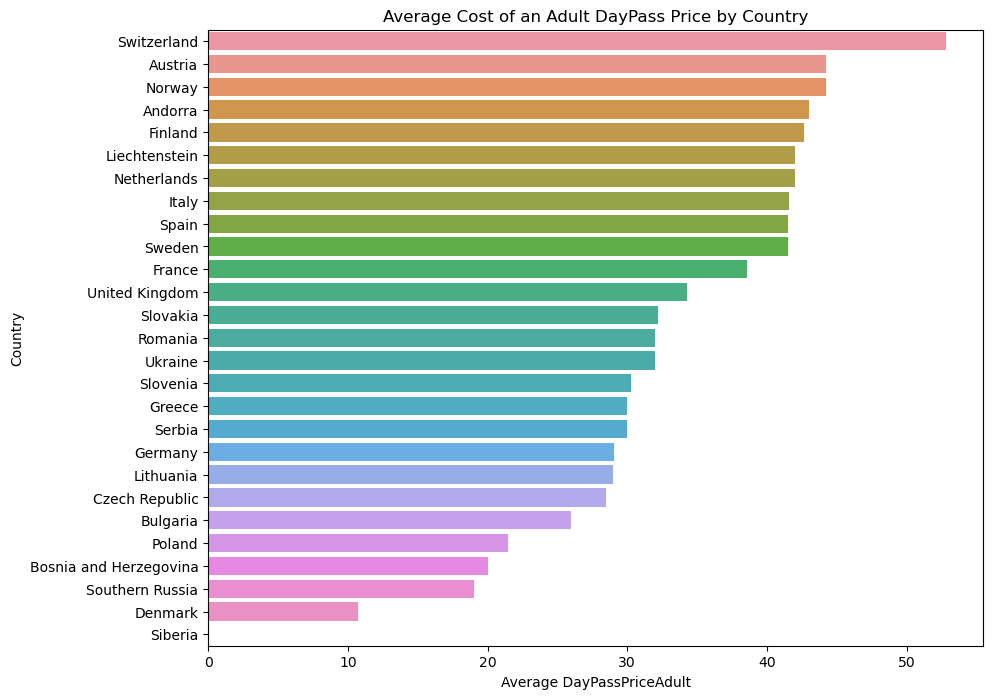

In [88]:
# Average Cost of an Adult DayPass Price by Country
plt.figure(figsize=(10, 8))

average_prices = df.groupby('Country')['DayPassPriceAdult'].mean().sort_values(ascending=False)

# a horizontal bar plot
sns.barplot(x=average_prices.values, y=average_prices.index)

plt.xlabel('Average DayPassPriceAdult')
plt.ylabel('Country')
plt.title('Average Cost of an Adult DayPass Price by Country')

plt.show()

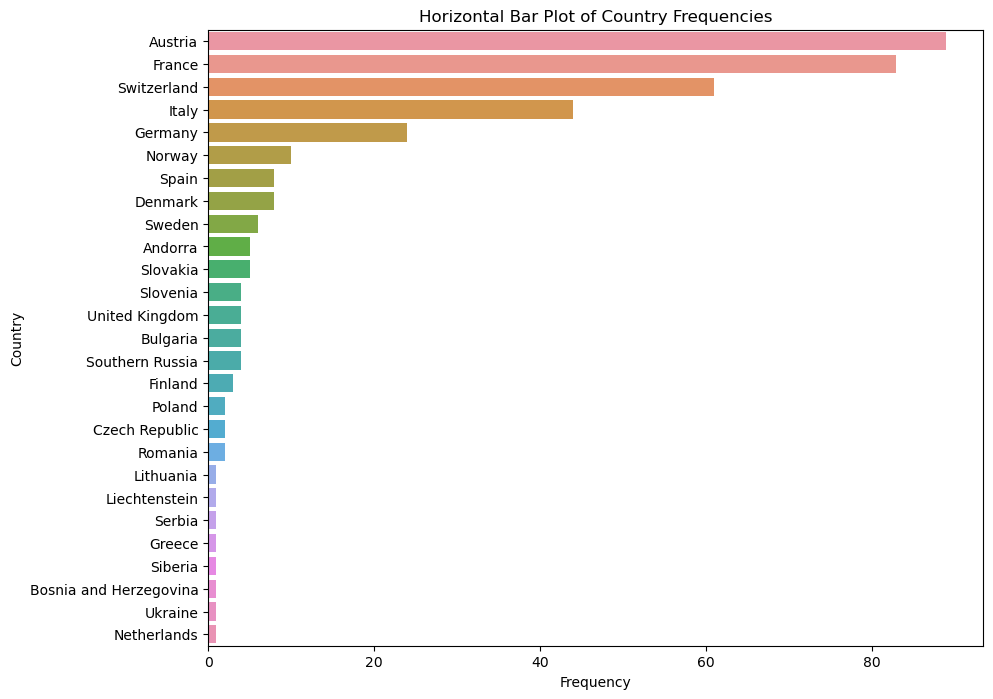

In [48]:
# horizontal bar plot of Country Frequencies

plt.figure(figsize=(10, 8)) 
sns.barplot(x=df['Country'].value_counts(), y=df['Country'].value_counts().index)
plt.xlabel('Frequency')
plt.ylabel('Country')
plt.title('Horizontal Bar Plot of Country Frequencies')

plt.show()

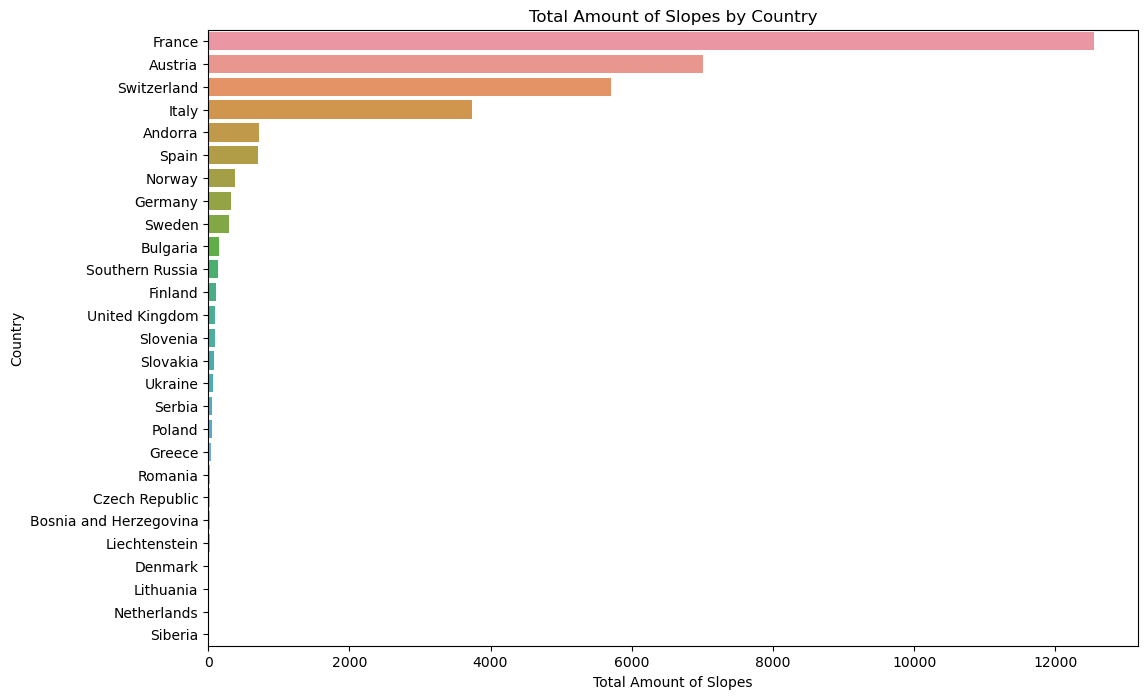

In [49]:
# total amount of slopes each country has
plt.figure(figsize=(12, 8))
total_slope_country = df.groupby('Country')['TotalSlope'].sum().sort_values(ascending=False)

# a horizontal bar plot
sns.barplot(x=total_slope_country.values, y=total_slope_country.index)

plt.xlabel('Total Amount of Slopes')
plt.ylabel('Country')
plt.title('Total Amount of Slopes by Country')

plt.show()



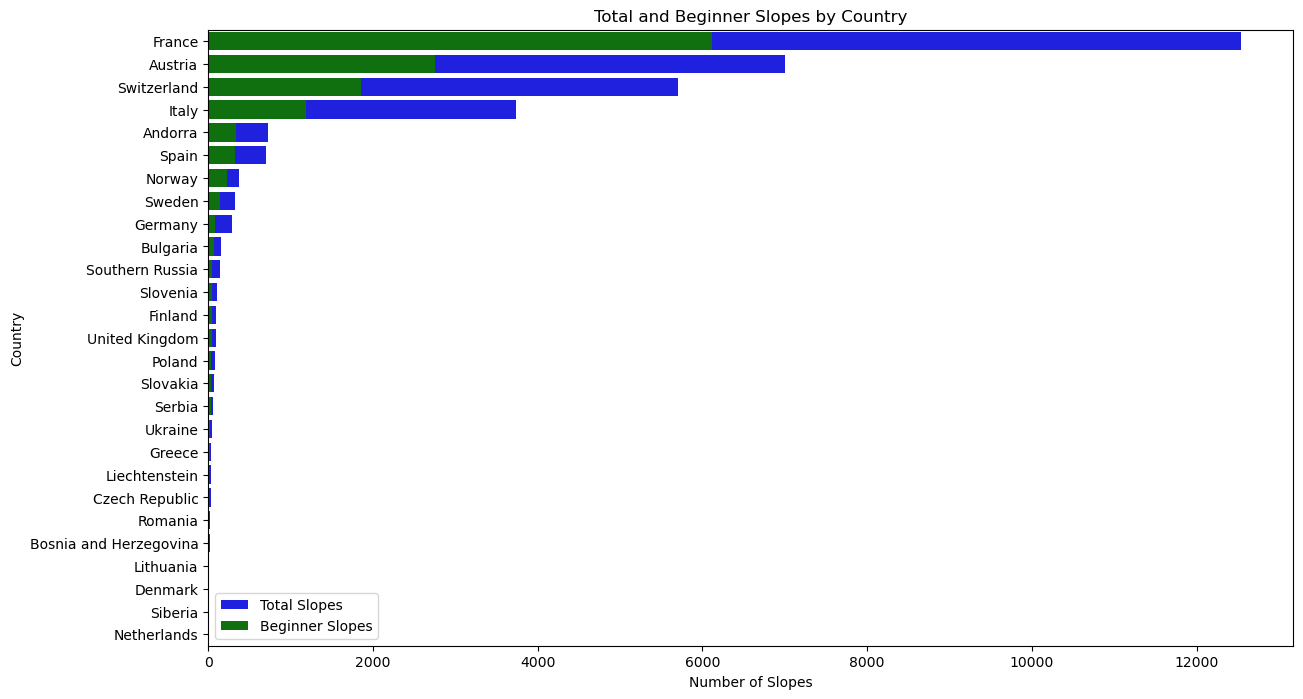

In [50]:
plt.figure(figsize=(14, 8))

total_slope_country = df.groupby('Country')['TotalSlope'].sum().sort_values(ascending=False)
beginner_slopes = df.groupby('Country')['BeginnerSlope'].sum().sort_values(ascending=False)

# a grouped bar plot
sns.barplot(x=total_slope_country.values, y=total_slope_country.index, label='Total Slopes', color='blue')
sns.barplot(x=beginner_slopes.values, y=beginner_slopes.index, label='Beginner Slopes', color='green')

plt.xlabel('Number of Slopes')
plt.ylabel('Country')
plt.title('Total and Beginner Slopes by Country')
plt.legend()

plt.show()

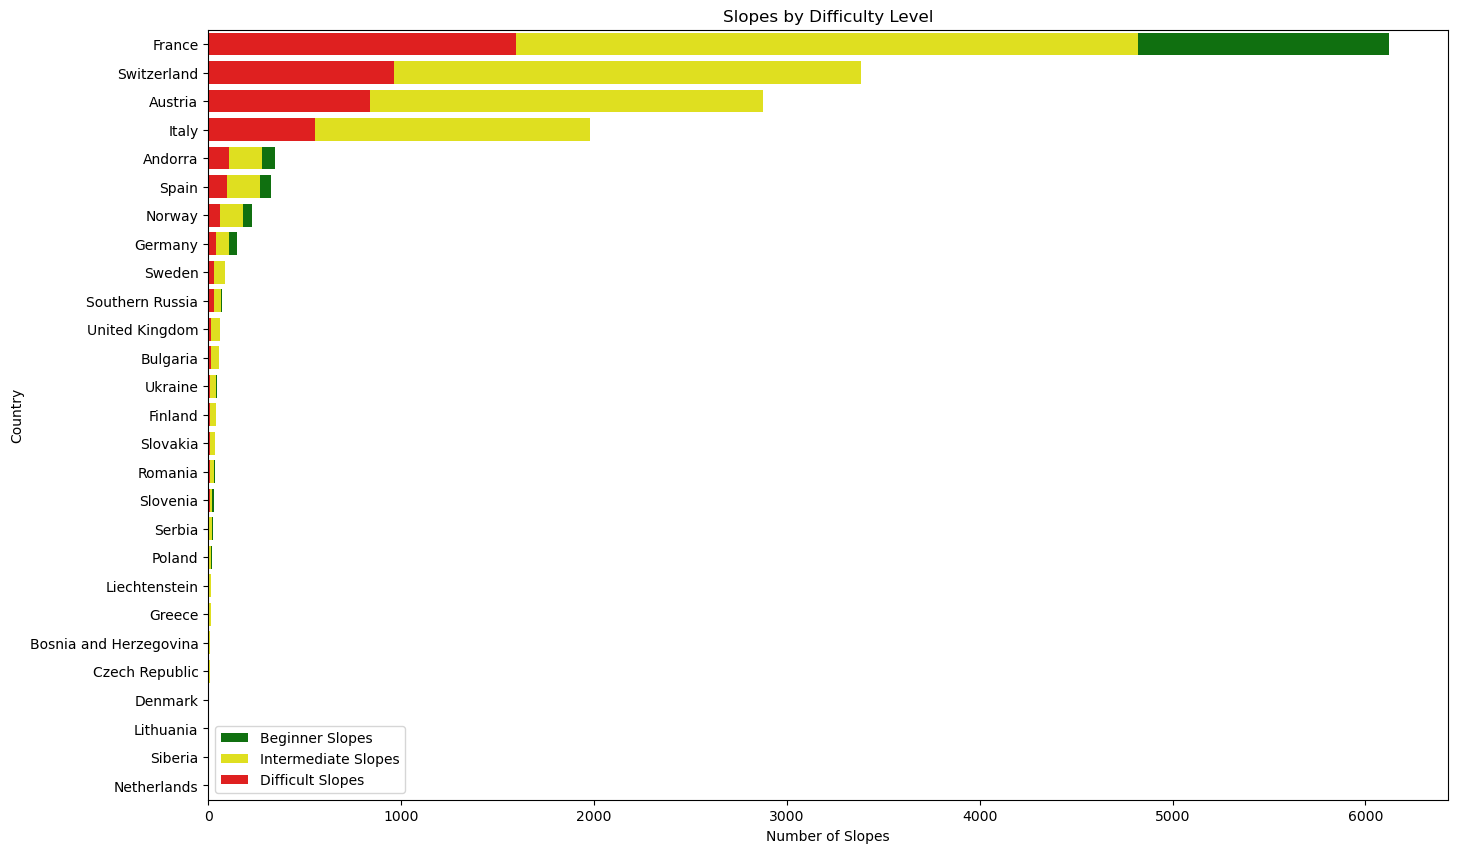

In [51]:
# total amount of slopes each country has
plt.figure(figsize=(16, 10))

# total amount of slopes
total_slope_country = df.groupby('Country')['TotalSlope'].sum().sort_values(ascending=False)

# slope level
beginner_slopes = df.groupby('Country')['BeginnerSlope'].sum().sort_values(ascending=False)
intermediate_slopes = df.groupby('Country')['IntermediateSlope'].sum().sort_values(ascending=False)
difficult_slopes = df.groupby('Country')['DifficultSlope'].sum().sort_values(ascending=False)

# a grouped bar plot
sns.barplot(x=beginner_slopes.values, y=beginner_slopes.index, label='Beginner Slopes', color='green')
sns.barplot(x=intermediate_slopes.values, y=intermediate_slopes.index, label='Intermediate Slopes', color='yellow')
sns.barplot(x=difficult_slopes.values, y=difficult_slopes.index, label='Difficult Slopes', color='red')

plt.xlabel('Number of Slopes')
plt.ylabel('Country')
plt.title('Slopes by Difficulty Level')
plt.legend()

plt.show()

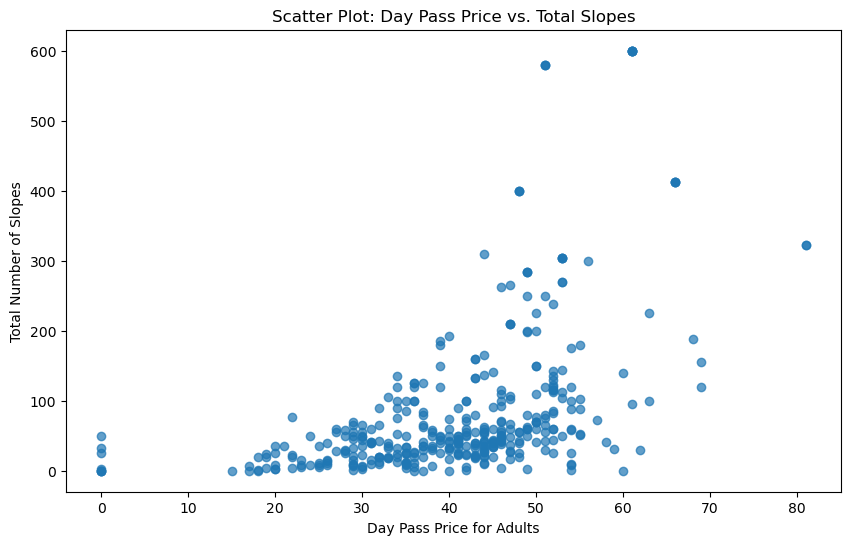

In [52]:
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(df['DayPassPriceAdult'], df['TotalSlope'], alpha=0.7)
# alpha - transparency of the points

plt.xlabel('Day Pass Price for Adults')
plt.ylabel('Total Number of Slopes')
plt.title('Scatter Plot: Day Pass Price vs. Total Slopes')

plt.show()

# we can use this for linear regression 

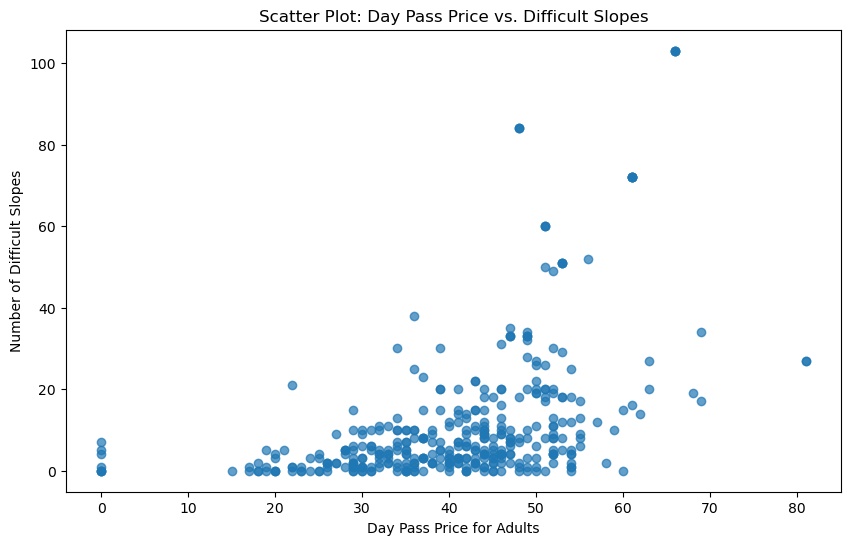

In [53]:
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(df['DayPassPriceAdult'], df['DifficultSlope'], alpha=0.7)

plt.xlabel('Day Pass Price for Adults')
plt.ylabel('Number of Difficult Slopes')
plt.title('Scatter Plot: Day Pass Price vs. Difficult Slopes')

plt.show()

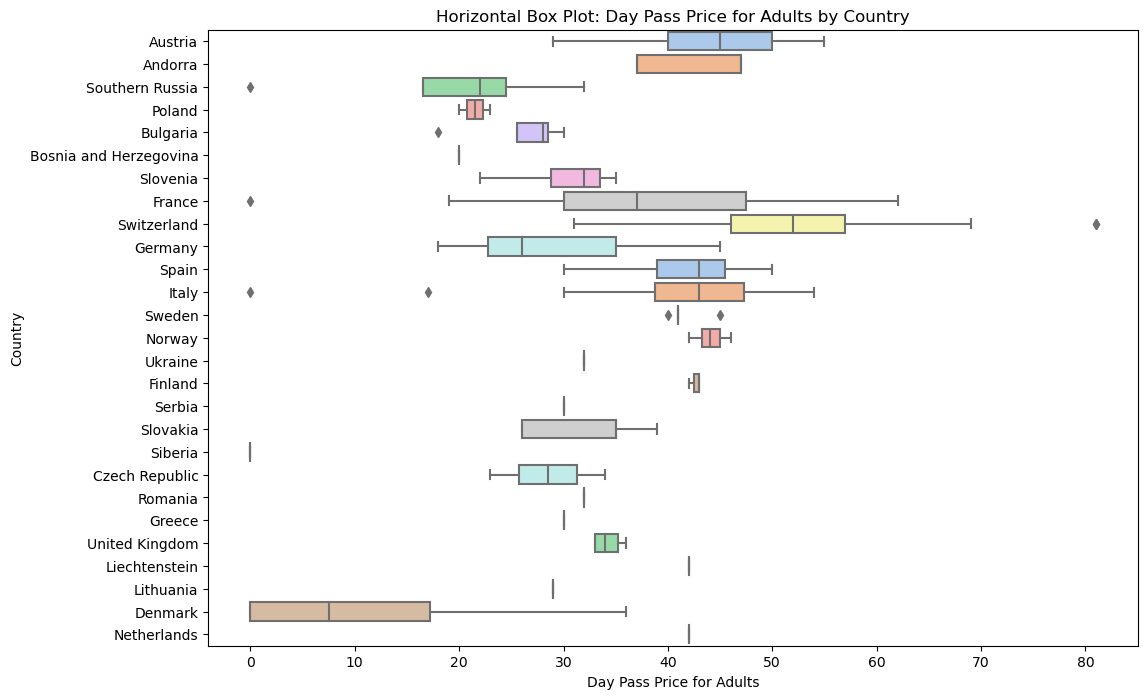

In [54]:
plt.figure(figsize=(12, 8))

# Horizontal box plot for DayPassPriceAdult
sns.boxplot(x='DayPassPriceAdult', y='Country', data=df, palette='pastel')
plt.xlabel('Day Pass Price for Adults')
plt.ylabel('Country')
plt.title('Horizontal Box Plot: Day Pass Price for Adults by Country')
# palette: https://seaborn.pydata.org/tutorial/color_palettes.html

plt.show()

In [55]:
# no variability? 
# netherlands, lithuania, liechtenstein, greece, romania, siberia, ukraine, bosnia and herzegovina

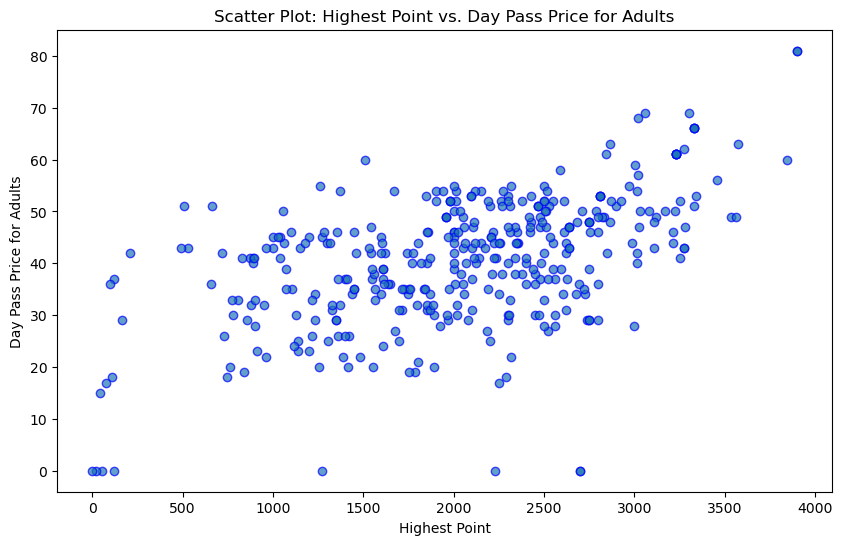

In [56]:
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(df['HighestPoint'], df['DayPassPriceAdult'], alpha=0.7, edgecolors='b')
# edgecolors = blue borders

plt.xlabel('Highest Point')
plt.ylabel('Day Pass Price for Adults')
plt.title('Scatter Plot: Highest Point vs. Day Pass Price for Adults')

plt.show()

# we can use this for linear regression 

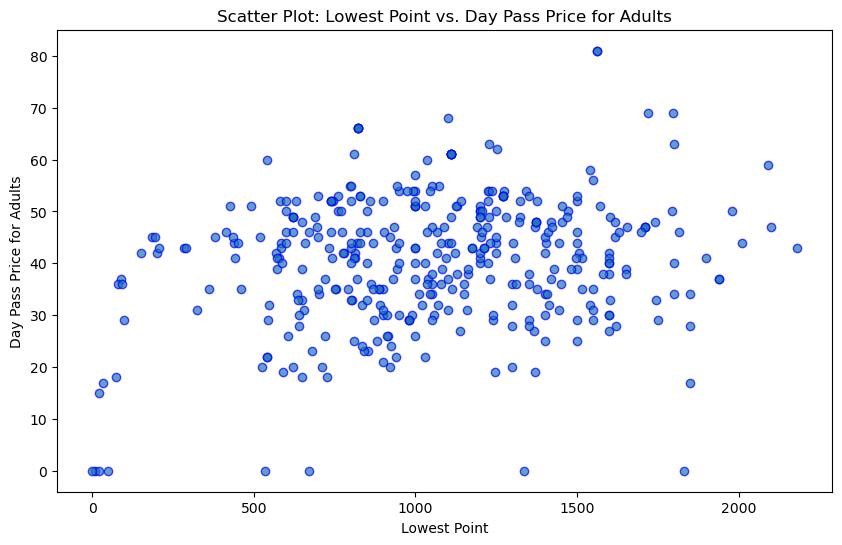

In [57]:
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(df['LowestPoint'], df['DayPassPriceAdult'], alpha=0.7, edgecolors='b')

plt.xlabel('Lowest Point')
plt.ylabel('Day Pass Price for Adults')
plt.title('Scatter Plot: Lowest Point vs. Day Pass Price for Adults')

plt.show()

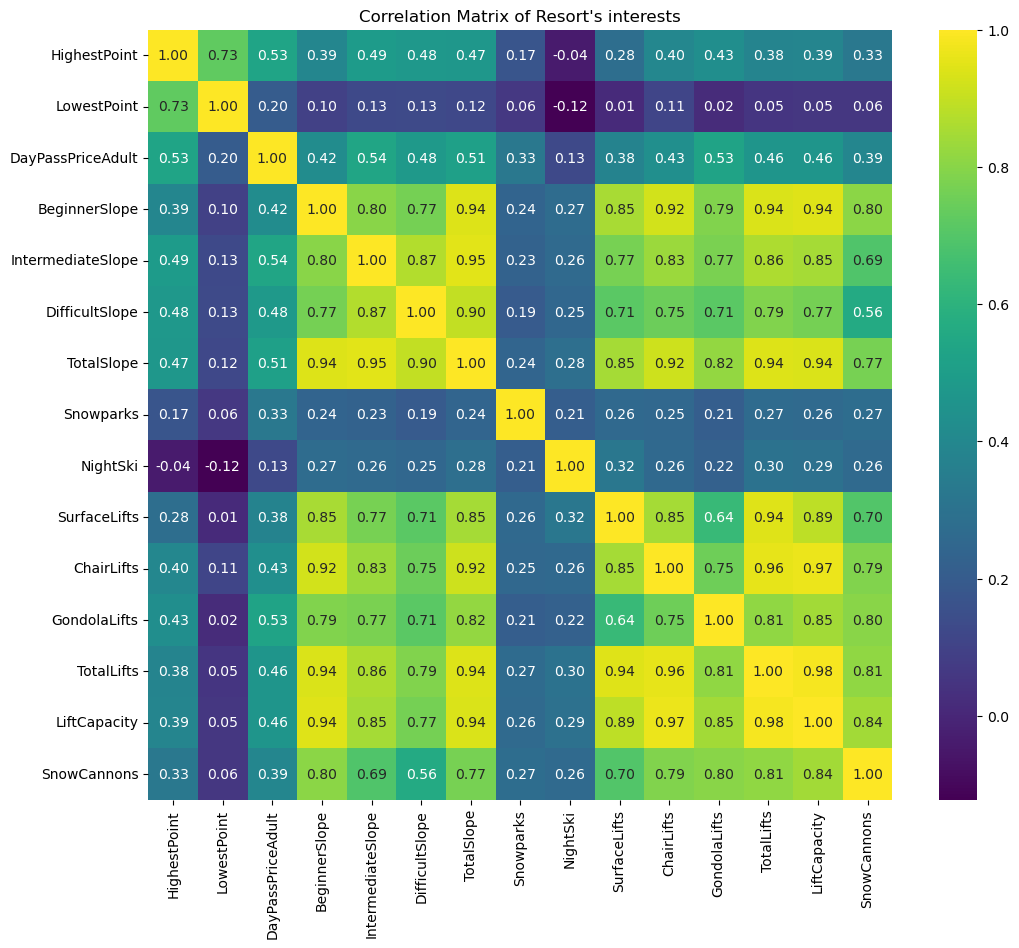

In [58]:
resort_interests = ['HighestPoint', 'LowestPoint', 'DayPassPriceAdult', 'BeginnerSlope', 'IntermediateSlope',
                    'DifficultSlope', 'TotalSlope', 'Snowparks', 'NightSki', 'SurfaceLifts',
                    'ChairLifts', 'GondolaLifts', 'TotalLifts', 'LiftCapacity', 'SnowCannons']

correlation_df = df[resort_interests]

# the correlation matrix
correlation_matrix = correlation_df.corr()

# heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
#annot; values in each cell
#fmt float formatting; 2 decimal places
plt.title('Correlation Matrix of Resort\'s interests')
plt.show()

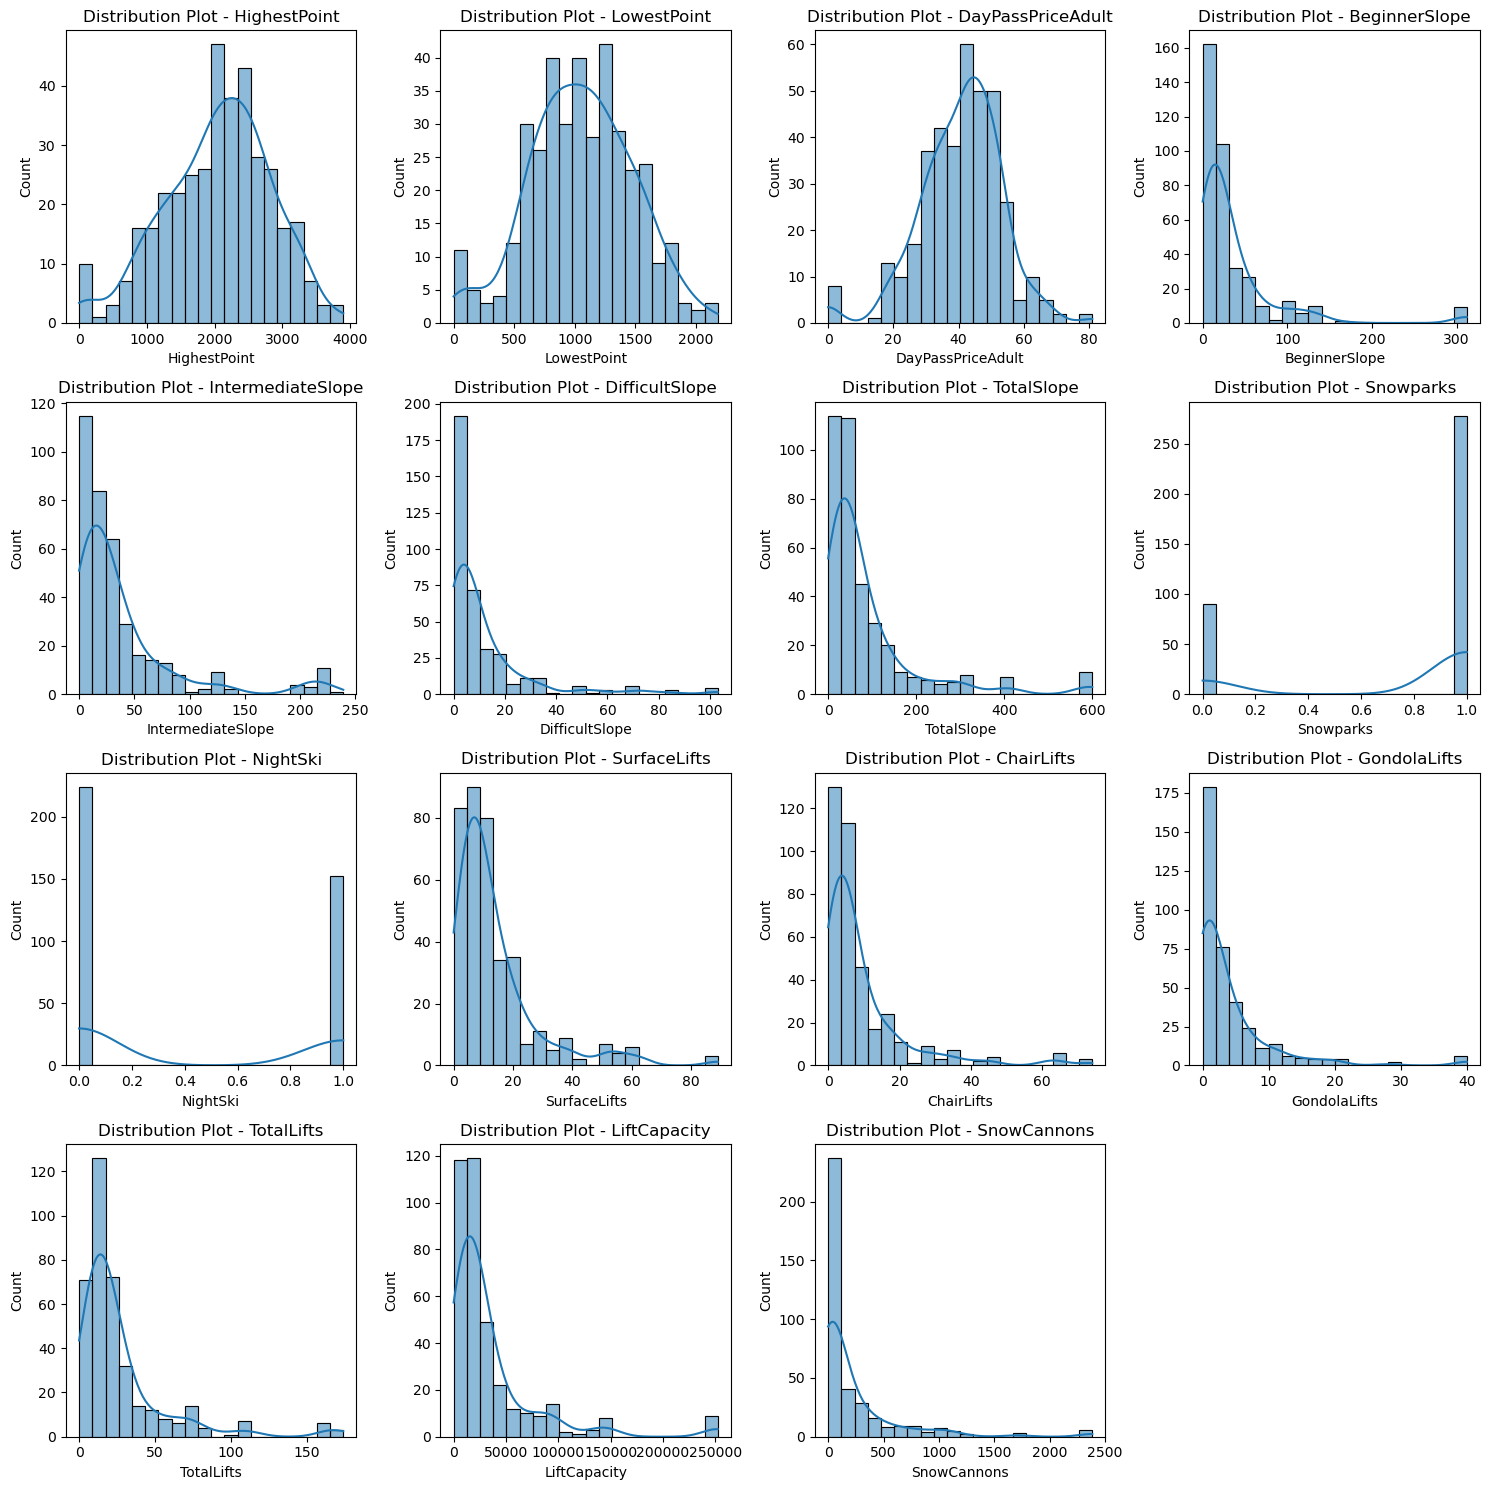

In [92]:
plt.figure(figsize=(15, 15))

# distribution plots for each interest
for i, column in enumerate(df[resort_interests].columns):
    # 4x4 grid
    plt.subplot(4, 4, i + 1)
    sns.histplot(data=df[column], kde=True, bins=20)
    plt.title(f'Distribution Plot - {column}')

# adjusting layout
plt.tight_layout()
plt.show()